# Logistic Regression

In [69]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
features = df.drop(columns='Outcome')
results = df['Outcome']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

x_train, x_test, y_train, y_test = train_test_split(features, results, train_size=0.7, random_state=68)

"""
purpose of standard scaler is to calculate the z-score of each sample using:
z = (x-u)/s where x is the sample, u is the mean, s is the standard dev
"""
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [72]:
def sensitivity(predicted_class, actual_class):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in np.arange(len(predicted_class)):
        if predicted_class[i] == actual_class.iloc[i]:
            if predicted_class[i] == 1:
                tp+=1
            else:
                tn+=1
        elif predicted_class[i] != actual_class.iloc[i]:
            if predicted_class[i] ==1:
                fp+=1
            else:
                fn+=1

    return (tp/(tp+fn))*100

def specificity(predicted_class, actual_class):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in np.arange(len(predicted_class)):
        if predicted_class[i] == actual_class.iloc[i]:
            if predicted_class[i] == 1:
                tp+=1
            else:
                tn+=1
        elif predicted_class[i] != actual_class.iloc[i]:
            if predicted_class[i] ==1:
                fp+=1
            else:
                fn+=1

    return (tn/(tn+fp))*100

In [73]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
342,1,0,68,35,0,32.0,0.389,22
207,5,162,104,0,0,37.7,0.151,52
705,6,80,80,36,0,39.8,0.177,28
568,4,154,72,29,126,31.3,0.338,37
755,1,128,88,39,110,36.5,1.057,37
...,...,...,...,...,...,...,...,...
240,1,91,64,24,0,29.2,0.192,21
236,7,181,84,21,192,35.9,0.586,51
202,0,108,68,20,0,27.3,0.787,32
423,2,115,64,22,0,30.8,0.421,21


In [74]:
x_train_scaled

array([[-0.85241942, -3.76778415, -0.06250057, ...,  0.01543219,
        -0.21363888, -0.96399601],
       [ 0.34509328,  1.26932266,  1.79350715, ...,  0.73659846,
        -0.9268809 ,  1.55792274],
       [ 0.64447145, -1.280324  ,  0.55616867, ...,  1.0022913 ,
        -0.84896371, -0.45961226],
       ...,
       [-1.1517976 , -0.40971294, -0.06250057, ..., -0.57921369,
         0.97909357, -0.12335642],
       [-0.55304125, -0.19206018, -0.26872365, ..., -0.13639229,
        -0.1177408 , -1.04805996],
       [ 0.94384963,  2.29539997,  0.04061097, ..., -0.85755856,
        -0.89091912,  1.81011462]])

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


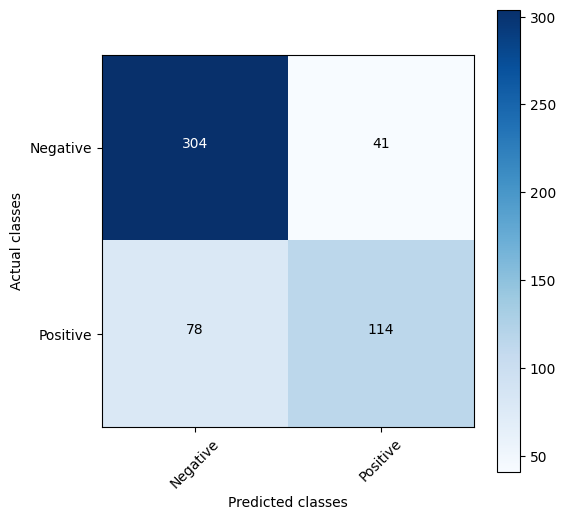

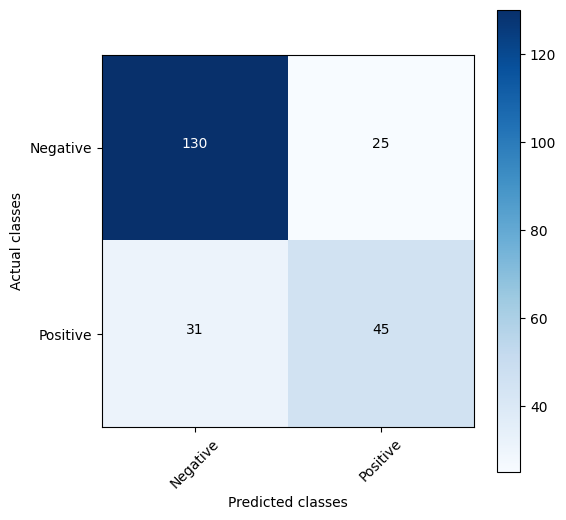


Training accuracy score of Logistic regression model: 77.84 %
Test accuracy score of Logistic regression model: 75.76 %


In [75]:
log_reg = LogisticRegression(random_state=25).fit(x_train, y_train)
predictions_train = log_reg.predict(x_train) # can change to scaled
predictions_test = log_reg.predict(x_test)

Cmatrix1 = confusion_matrix(y_train, predictions_train)
Cmatrix2 = confusion_matrix(y_test, predictions_test)

coefficients = log_reg.coef_

def plot_cmatrix(Cmatrix):
    #   plotting confusion matrix for data visualization
    fig, ax = plt.subplots(figsize=(6,6))
    cax = ax.matshow(Cmatrix, cmap='Blues')
    fig.colorbar(cax)

    class_names = ['Negative','Positive']
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.xaxis.set_ticks_position('bottom')
    plt.xticks(rotation=45)
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.xlabel('Predicted classes')
    plt.ylabel('Actual classes')
    # plt.title('Confusion Matrix')

    # adding text annotations to the cells
    thresh = Cmatrix.max() / 2.
    for i in range(Cmatrix.shape[0]):
        for j in range(Cmatrix.shape[1]):
            plt.text(j, i, format(Cmatrix[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if Cmatrix[i, j] > thresh else "black")

    plt.show()
plot_cmatrix(Cmatrix1)
plot_cmatrix(Cmatrix2)

train_accuracy = log_reg.score(x_train,y_train) # can change to scaled
test_accuracy = log_reg.score(x_test,y_test)

print('\nTraining accuracy score of Logistic regression model:',format(train_accuracy*100,'.2f'),"%")
print('Test accuracy score of Logistic regression model:',format(test_accuracy*100,'.2f'),"%")

In [76]:
print('Training accuracy score of Logistic regression model:',format(train_accuracy*100,'.2f'),"%")
print('Training sensitivity score of Logistic regression model:',format(sensitivity(predictions_train,y_train),'.2f'),"%")
print('Training specificity score of Logistic regression model:',format(specificity(predictions_train,y_train),'.2f'),"%")

Training accuracy score of Logistic regression model: 77.84 %
Training sensitivity score of Logistic regression model: 59.38 %
Training specificity score of Logistic regression model: 88.12 %


In [77]:
print('Test accuracy score of Logistic regression model:',format(test_accuracy*100,'.2f'),"%")
print('Test sensitivity score of Logistic regression model:',format(sensitivity(predictions_test,y_test),'.2f'),"%")
print('Test specificity score of Logistic regression model:',format(specificity(predictions_test,y_test),'.2f'),"%")

Test accuracy score of Logistic regression model: 75.76 %
Test sensitivity score of Logistic regression model: 59.21 %
Test specificity score of Logistic regression model: 83.87 %


In [78]:
print('Coefficient of pregnancy: \t',format(coefficients[0, 0],'.5f'))
print('Coefficient of glucose: \t',format(coefficients[0, 1],'.5f'))
print('Coefficient of blood pressure: \t',format(coefficients[0, 2],'.5f'))
print('Coefficient of skin thickness: \t',format(coefficients[0, 3],'.5f'))
print('Coefficient of insulin: \t',format(coefficients[0, 4],'.5f'))
print('Coefficient of BMI: \t\t',format(coefficients[0, 5],'.5f'))
print('Coefficient of DPF: \t\t',format(coefficients[0, 6],'.5f'))
print('Coefficient of Age: \t\t',format(coefficients[0, 7],'.5f'))

Coefficient of pregnancy: 	 0.12406
Coefficient of glucose: 	 0.03430
Coefficient of blood pressure: 	 -0.01144
Coefficient of skin thickness: 	 -0.01101
Coefficient of insulin: 	 0.00026
Coefficient of BMI: 		 0.10723
Coefficient of DPF: 		 0.90496
Coefficient of Age: 		 0.01802


# Random Forest Classifier

**After several runs and experimenting on different values of parameters for the logistic regression model, the test accuracy remained below 80% which makes this method of predicting diabetes subpar. Moving on, we try Random Forest Classifier which is an upgraded version of Decision Tree Classifier. We use the same dataset.**

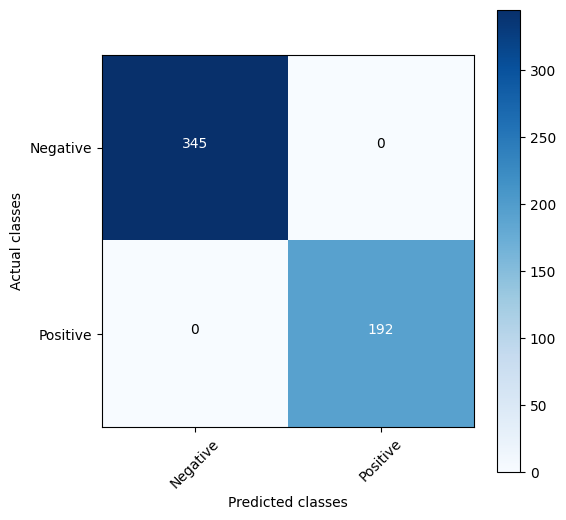

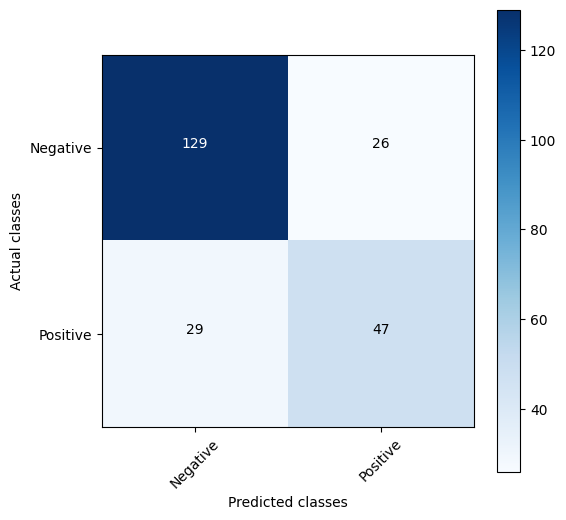


Training accuracy score of Logistic regression model: 100.00 %
Test accuracy score of Logistic regression model: 76.19 %


In [79]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=12,n_estimators=50)
classifier.fit(x_train, y_train)

train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)

predicts_train = classifier.predict(x_train)
predicts_test = classifier.predict(x_test)

# creating and plotting confusion matrices
Cmatrix3 = confusion_matrix(y_train, predicts_train)
Cmatrix4 = confusion_matrix(y_test, predicts_test)
plot_cmatrix(Cmatrix3)
plot_cmatrix(Cmatrix4)

print('\nTraining accuracy score of Logistic regression model:',format(train_score*100,'.2f'),"%")
print('Test accuracy score of Logistic regression model:',format(test_score*100,'.2f'),"%")

In [80]:
print('Training accuracy score of Logistic regression model:',format(train_score*100,'.2f'),"%")
print('Training sensitivity score of Logistic regression model:',format(sensitivity(predicts_train,y_train),'.2f'),"%")
print('Training specificity score of Logistic regression model:',format(specificity(predicts_train,y_train),'.2f'),"%")

Training accuracy score of Logistic regression model: 100.00 %
Training sensitivity score of Logistic regression model: 100.00 %
Training specificity score of Logistic regression model: 100.00 %


In [81]:
print('Test accuracy score of Random Forest Classifier:',format(test_score*100,'.2f'),"%")
print('Test sensitivity score of Random Forest Classifier:',format(sensitivity(predicts_test,y_test),'.2f'),"%")
print('Test specificity score of Random Forest Classifier:',format(specificity(predicts_test,y_test),'.2f'),"%")

Test accuracy score of Random Forest Classifier: 76.19 %
Test sensitivity score of Random Forest Classifier: 61.84 %
Test specificity score of Random Forest Classifier: 83.23 %


In [82]:
# input variables
preg = 0
glucose = 140
bp = 60
skinThickness = 12
insulin = 100
bmi = 18.5
dpf = 0.20
age = 21

sample = pd.DataFrame({'Pregnancies':[preg], 'Glucose':[glucose], 'BloodPressure':[bp], 'SkinThickness':[skinThickness], 
                        'Insulin':[insulin], 'BMI':[bmi], 'DiabetesPedigreeFunction':[dpf], 'Age':[age]})
display(sample)

z = classifier.predict(sample)
zz = log_reg.predict(sample)
if z[0] == 1:
    print('Using Random Forest Classifier: Patient is POSITIVE for diabetes.')
else:
    print('Using Random Forest Classifier: Patient is NEGATIVE for diabetes.')
if zz[0] == 1:
    print('Using Logistic Regression Model: Patient is POSITIVE for diabetes.')
else:
    print('Using Logistic Regression Model: Patient is NEGATIVE for diabetes.')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,140,60,12,100,18.5,0.2,21


Using Random Forest Classifier: Patient is NEGATIVE for diabetes.
Using Logistic Regression Model: Patient is NEGATIVE for diabetes.
